# Import Required Packages

In [1]:
# Imports
import os
import datetime
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns



# Input data from User

In [2]:
#Market analysed: 'Investment','FullYear','DayAhead','Balancing' (choose one or several)
market_analysed=['DayAhead'] 
output='EconomyGeneration'
#Countries in focus
#ccc_in_focus = ['DENMARK', 'GERMANY', 'NORWAY', 'GREAT_BRITAIN','BELGIUM','HOLLAND']




# Plot Settings

In [3]:
# Set plotting specifications
% matplotlib inline
plt.rcParams.update({'font.size': 21})
plt.rcParams['xtick.major.pad']='12'
plt.rc('legend', fontsize=16)
y_limit = 1.1
lw = 3

UsageError: Line magic function `%` not found.


# Read Input Files

In [4]:
data=pd.DataFrame()
for market in market_analysed:
    csvfiles = []
    for file in glob.glob("./input/results/" + market + "/*.csv"):
        csvfiles.append(file)

    csvfiles=[file.replace('./input\\','') for file in csvfiles] 
    csvfiles=[file.replace('.csv','') for file in csvfiles]  
    csvfiles=[file.split('_') for file in csvfiles]  
    csvfiles = np.asarray(csvfiles)  
    csvfiles=pd.DataFrame.from_records(csvfiles)
    
    csvfiles.rename(columns={0: 'Output', 1: 'Scenario',2: 'Year',3:'Subset'}, inplace=True)
    scenarios=csvfiles.Scenario.unique().tolist()
    years=csvfiles.Year.unique().tolist()
    subsets=csvfiles.Subset.unique().tolist()

    for scenario in scenarios:
        for year in years:
            for subset in subsets:
                file = "./input/results/"+ market + "/"+ output + "_" + scenario + "_" + year + "_" + subset + ".csv"
                if os.path.isfile(file):
                    df=pd.read_csv(file,encoding='utf8')
                    df['Scenario'] = scenario
                    df['Market']   = market
                    #Renaming columns just in case timeconversion was required
#                    df.renSame(columns = {'G':'GGG', 'C':'CCC', 'Y':'YYY','TTT_NEW':'TTT','SSS_NEW':'SSS'}, inplace = True) 
                    data=data.append(df) 
#                    del df

                
                

In [13]:
data

,Year,Country,Region,Area,Technology,Fuel,Technology type,Category,Subcategory,Units,Value,Scenario,Market
0,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,COSTS,GENERATION_FIXED_COSTS,Mmoney,155.425893,NoSectorCoupling,DayAhead
1,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,COSTS,GENERATION_OPERATIONAL_COSTS,Mmoney,81.53141625,NoSectorCoupling,DayAhead
2,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,COSTS,GENERATION_FUEL_COSTS,Mmoney,315.1386244,NoSectorCoupling,DayAhead
3,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,COSTS,GENERATION_UC_COSTS,Mmoney,48.07346813,NoSectorCoupling,DayAhead
4,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,INCOME,ELECTRICITY_SALE,Mmoney,1346.183153,NoSectorCoupling,DayAhead
5,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,REVENUE,TOTAL_REVENUE,Mmoney,746.0137515,NoSectorCoupling,DayAhead
6,2020,BELGIUM,BE_R,BE_A,SteamTur-CON-NUCL,NUCLEAR,CONDENSING,REVENUE,ENERGY_SPECIFIC_REVENUE,Money_per_MWh,15.6928994,NoSectorCoupling,DayAhead
7,2020,BELGIUM,BE_R,BE_A,HY-ROR,WATER,HYDRO-RUN-OF-RIVER,COSTS,GENERATION_FIXED_COSTS,Mmoney,11.16,NoSectorCoupling,DayAhead
8,2020,BELGIUM,BE_R,BE_A,HY-ROR,WATER,HYDRO-RUN-OF-RIVER,INCOME,ELECTRICITY_SALE,Mmoney,46.15833414,NoSectorCoupling,DayAhead
9,2020,BELGIUM,BE_R,BE_A,HY-ROR,WATER,HYDRO-RUN-OF-RIVER,REVENUE,TOTAL_REVENUE,Mmoney,34.99833414,NoSectorCoupling,DayAhead


# Additional set declaration

In [14]:
ccc = list(data.CCC.unique())
rrr = list(data.RRR.unique())
tech_type = list(data.TECH_TYPE.unique())
commodity = list(data.COMMODITY.unique())
fff = list(data.FFF.unique())
sss = list(full_timesteps.SSS.unique())
ttt = list(full_timesteps.TTT.unique())


AttributeError: 'DataFrame' object has no attribute 'CCC'

# Make Directories


In [ ]:
# Make output folder
if not os.path.isdir('output'):
    os.makedirs('output')

In [ ]:
# Make CurtailmentHourly folder
if not os.path.isdir('output/' + output):
    os.makedirs('output/' + output)

In [ ]:
# Make market folder
for market in market_analysed:
    if not os.path.isdir('output/' + output + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output + '/'+ market +'/Country_wise')
# Make country folder
    if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise'):
        os.makedirs('output/' + output  + '/'+ market  +'/Country_wise')
    # Make country wise folders
    for c in ccc:
        if not os.path.isdir('output/' + output  + '/'+ market +'/Country_wise/' + c):
            os.makedirs('output/' + output  + '/'+ market +'/Country_wise/' + c)

# Plotting

In [ ]:
# Make data frames to plot
data_plot = data[(data.SSS.isin(s)) & (data.TTT.isin(t))]
data_plot = data[data.CCC.isin(ccc_in_focus)]

In [5]:
data_plot = data[(data.Scenario == 'NoSectorCoupling') & (data.Subcategory =='ENERGY_SPECIFIC_REVENUE') 
                & ((data['Technology type'] == 'WIND-OFF') | (data['Technology type'] == 'WIND-ON'))
                ]
data_plot.Value=pd.to_numeric(data_plot.Value)

C:\Users\s151529\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


## Plot per year, scenario, market 

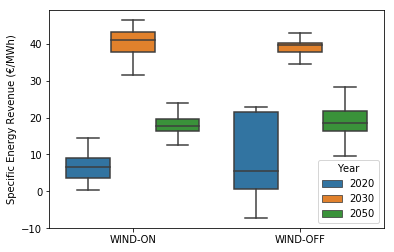

In [7]:
ax1=sns.boxplot(x="Technology type", y="Value", hue="Year", data=data_plot, showfliers = False,order=['WIND-ON','WIND-OFF'])
ax1.set_xlabel('')
ax1.set_ylabel(ylabel='Specific Energy Revenue (€/MWh)')
plt.show()
figure = ax1.get_figure()
figure.savefig('NoSectorCoupling.png', dpi=1000)